# Logistic regression

Logistic regression is used when the outcome (dependent variable) has two possible values or categories. Because it is almost always used with two or more independent variables, is should be called multiple logistic regression.

|Type of regression|Dependent var (Y)|Examples
|---|---|---|
|Linear|Continuous (interval, ratio)|Enzyme activity, renal function, weight etc.
|Logistic|Binary (dichotomous)|Death during surgery, graduation, recurrence of cancer etc.
|Proportional hazards|Elapsed time to event|Months until death, quarters in school before graduation etc.

The odds of an event occuring equals the probability that that event will occur divided by the probability that it will not occur. Every probability can be expressed as odds, every odds can be expressed as a probability.

The logistic regression model computes the odds from baseline odds and from odds ratios computed for each independent variable:
$ Odds = (Baseline Odds).OR_1.OR_2.(...)OR_n $
The baseline odds answers this question, if every single independent X variables equaled 0 what are te odds of a particular category? To make the baseline odds meaningful, we can encode that variable as $Age - 20 $ so that $X=0$ would encode people who are 20.

For each continuous variable such as the age, the corresponding odds ratio answers the question, for each additional year of age, by how much do the odds increase or decrease? If the OR associated with age equals 1.0, then the age is not related. If $OR>1$ then the odds increase by a set percentage for each additional year of age. For instance, an OR of 1.03 would mean that the odds of Y increase by 3% as a person grows older by one year.

$$
Y_i = \beta_0 + \beta_1.X_{i,1} + \beta_2.X_{i,2} + ... + \beta_n.X_{i,n}
$$
with $Y_i$ the natural log of the odds for a particular participant, $\beta_0$ the natural log of the baseline odds, $\beta_2$ the natural log of the odds ratio for the first independent variable etc. For example:
$$
\log\left[\frac{prob(HR_{suicide=oui})}{1-prob(HR_{suicide=oui})}\right] = a + b \times duree + c \times a
$$

The Y value is the natural log of odds, which can be transformed to a probability. Since it implicitly embodies uncertainty, there is no need to explicitly add a random term to the model. Because there is no Gaussian distribution, the method of least squares is not used, instead logistic regression finds the values of the odds ratios using what is called a _maximum likelihood method_ (MLE).

## Fitting a simple model

In [1]:
# let's try the simplest example taken from the MOOC 'Introduction à la statistique avec R'
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
data = pd.read_csv('../data/smp2.csv', delimiter=';')
data.head()

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,...,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,...,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,...,0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0
2,50.0,prof.intermediaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,...,0,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,...,0,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,...,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 26 columns):
age             797 non-null float64
prof            793 non-null object
duree           576 non-null float64
discip          793 non-null float64
n.enfant        773 non-null float64
n.fratrie       799 non-null int64
ecole           794 non-null float64
separation      788 non-null float64
juge.enfant     794 non-null float64
place           792 non-null float64
abus            792 non-null float64
grav.cons       795 non-null float64
dep.cons        799 non-null int64
ago.cons        799 non-null int64
ptsd.cons       799 non-null int64
alc.cons        799 non-null int64
subst.cons      799 non-null int64
scz.cons        799 non-null int64
char            703 non-null float64
rs              696 non-null float64
ed              692 non-null float64
dr              688 non-null float64
suicide.s       758 non-null float64
suicide.hr      760 non-null float64
suicide.past    785 no

In [4]:
data_ = data.dropna(subset=['suicide.hr', 'abus'], how='any')
y = data_['suicide.hr']
X = data_['abus']
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.494196
         Iterations 5


In [5]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             suicide.hr   No. Observations:                  753
Model:                          Logit   Df Residuals:                      751
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Nov 2018   Pseudo R-squ.:                 0.02098
Time:                        13:01:57   Log-Likelihood:                -372.13
converged:                       True   LL-Null:                       -380.11
                                        LLR p-value:                 6.494e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6161      0.115    -14.003      0.000      -1.842      -1.390
abus           0.7688      0.190      4.052      0.000       0.397       1.141
==============================================================================
"""

In [6]:
result.params

const   -1.616082
abus     0.768785
dtype: float64

In [7]:
result.conf_int()

,0,1
const,-1.842275,-1.389890
abus,0.396937,1.140632


In [8]:
OR = np.exp(result.params[1])
CI_OR=np.round(np.exp(np.array([.396937, 1.140632])), 2)
print(f"Odds ratio: {OR:3.2f}")
print(f"CI of the OR: {CI_OR}")

Odds ratio: 2.16
CI of the OR: [1.49 3.13]


In [9]:
data_['abus'].unique()

array([0., 1.])

The independent variable has two possible values. The corresponding odds ratio is 1.0 for `abus=0`and 2.16 for `abus=1`, meaning that participant with `abus=1` has a bit more than twice the odds of being `suicide.hr`, with CI ranging from 1.49 to 3.13.
If the H0 were true, the OR would equal 1.0, but the CI above doesn't include 1.0, so the corresponding P value must be less than 0.05.

### Analysis of the corresponding contingency table

In [10]:
from scipy import stats

In [11]:
table = pd.crosstab(data_['suicide.hr'], data_['abus'])
OR, pval = stats.fisher_exact(table)
print(table)
print(f"Fischer's odds ratio: {OR}")
print(f"Fischer's P value: {pval}")

abus        0.0  1.0
suicide.hr          
0.0         453  147
1.0          90   63
Fischer's odds ratio: 2.157142857142857
Fischer's P value: 7.357964669107829e-05


## Fitting a more complex model

In [12]:
data_ = data.dropna(
    subset=['suicide.hr', 'abus', 'discip', 'duree', 'age'], how='any')

In [13]:
y = data_['suicide.hr']
X = data_[['abus', 'discip', 'duree', 'age']]
# duree is graduated from 1 to 5 --> better to get dummy
X = sm.add_constant(X)
model2 = sm.Logit(y, X)
result2 = model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.484332
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.042     
Dependent Variable: suicide.hr       AIC:              542.7654  
Date:               2018-11-08 13:02 BIC:              564.3150  
No. Observations:   550              Log-Likelihood:   -266.38   
Df Model:           4                LL-Null:          -277.97   
Df Residuals:       545              LLR p-value:      0.00011671
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.1058     0.5304    0.1995   0.8418   -0.9338    1.1454
abus       0.6161     0.2279    2.7031   0.0069    0.1694 

In [14]:
ORs = np.exp(result2.params)
ORs

const     1.111641
abus      1.851698
discip    1.602105
duree     0.694905
age       0.993530
dtype: float64

In [15]:
.99**15

0.8600583546412884

The OR for `age` is 0.99. Every year, the odds ratio of `suicide.hr` goes down about 1%. The OR for a 40-y compared to a 25-y is $0.99^{15}$, with the exponent equals $40-15$. That means a 40-y persone has about 14% lower odds of being `suicide.hr` than a 25-y.

The same assumptions and attentions as for multiple regression applied to logistic regression (e.g. at least 5-10 events per variable, not too many independent variables in the model, etc.)

## Using R-style formula

In [16]:
import statsmodels.formula.api as smf

In [17]:
model2 = smf.logit(formula="Q('suicide.hr') ~ abus + discip + duree + age", 
                 data=data_)

In [31]:
model2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.484332
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Q('suicide.hr')   No. Observations:                  550
Model:                          Logit   Df Residuals:                      545
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Nov 2018   Pseudo R-squ.:                 0.04169
Time:                        13:03:46   Log-Likelihood:                -266.38
converged:                       True   LL-Null:                       -277.97
                                        LLR p-value:                 0.0001167
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1058      0.530      0.200      0.842      -0.934       1.145
abus           0.6161      0.228      2.703      0.007       0.169       1.063
discip         0.4713      0.251      1.881      0.060      -0.020       0.962
duree         -0.3640      0.127     -2.864      0.004      -0.613      -0.115
age           -0.0065      0.009     -0.700      0.484      -0.025       0.012
==============================================================================
"""

## Interactions

In [18]:
data_ = data.dropna(
    subset=['suicide.hr', 'abus', 'discip', 'duree'], how='any')
data_['duree*discip'] = data_['duree'] * data_['discip']

y = data_['suicide.hr']
X = data_[['abus', 'duree*discip']]

X = sm.add_constant(X)
model3 = sm.GLM(y, X, family=sm.families.Binomial())
result3 = model3.fit()
print(result3.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            551.7420  
Link Function:      logit            BIC:            -2905.7833
Dependent Variable: suicide.hr       Log-Likelihood: -272.87   
Date:               2018-11-08 13:02 LL-Null:        -277.97   
No. Observations:   550              Deviance:       545.74    
Df Model:           2                Pearson chi2:   550.      
Df Residuals:       547              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -1.6547   0.1466 -11.2844 0.0000 -1.9421 -1.3673
abus            0.5841   0.2239   2.6089 0.0091  0.1453  1.0229
duree*discip    0.0856   0.0524   1.6347 0.1021 -0.0170  0.1883



c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Proportional hazards regression

is similar to logistic regression but is used when the outcome is elapsed time to an event and is often used for analyses of survival times.

In [19]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
surv = pd.read_csv('../data/alcool.csv', delimiter=';')

In [21]:
surv.head()

,t,SEVRE,AGE,SEXE,EDVNEG
0,121,0,53,1,0
1,121,0,52,2,0
2,40,0,45,2,0
3,39,0,48,1,1
4,66,0,45,1,0


## logrank test (categories)

In [22]:
surv_ = surv[['t', 'SEVRE', 'SEXE', 'AGE']]

   test_statistic         p
0        0.023537  0.878069


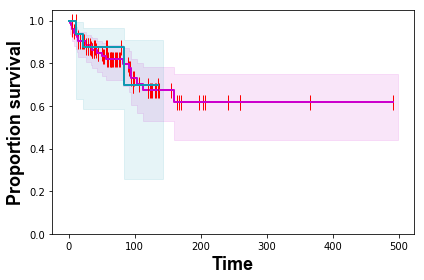

In [23]:
# survival analysis as a function of sex
ix = surv_['SEXE'] == 1

kmf2 = KaplanMeierFitter()

#plt.rcParams["figure.figsize"] = (6,4)

kmf2.fit(surv_['t'][ix], surv_['SEVRE'][ix])
ax=kmf2.plot(legend=None, show_censors=True, ci_alpha=.1, lw=2, c="#CC00CC",
              censor_styles={'marker':'|', 'ms': 15, 'mew':1, 'markerfacecolor':'red', 
                             'markeredgecolor': 'red'})

kmf2.fit(surv_['t'][~ix], surv_['SEVRE'][~ix])
kmf2.plot(ax=ax, legend=None, show_censors=True, ci_alpha=.1, lw=2, c="#0F99B2",
              censor_styles={'marker':'|', 'ms': 15, 'mew':1, 'markerfacecolor':'red', 
                             'markeredgecolor': 'red'},)

plt.ylabel('Proportion survival', fontdict={'fontname':'arial', 'size': 18, 'weight': 'bold'})
plt.ylim([0,1.05])
#plt.yticks(fontsize=16)

#plt.setp(ax.spines.values(), linewidth=2)
plt.xlabel('Time', fontdict={'fontname':'arial','size': 18, 'weight': 'bold'})

plt.tight_layout()

from lifelines.statistics import logrank_test
results = logrank_test(surv_['t'][ix], surv_['t'][~ix],
                      surv_['SEVRE'][ix], surv_['SEVRE'][~ix])
print(results.summary)

The P value was 0.878, so the difference between the two survival curves was not considered to be statistically significant. Next we do a more sophisticated analysis that adjusts for differences in age, sexe etc.

## Cox regression (proportional hazards regression)

Uses regression methods to fit the relative risk associated with each independent variable, along with a CI and P value testing the H0 that the population relative risk is 1.0.

the name implies we regress covariates (e.g., year elected, country, etc.) against a another variable – in this case durations and lifetimes. Similar to the logic in the first part of this tutorial, we cannot use traditional methods like linear regression.

There are two popular competing techniques in survival regression: Cox’s model and Aalen’s additive model. Both models attempt to represent the hazard rate λ(t|x) as a function of t and some covariates x. In Cox’s model, the relationship is defined:
$$
λ(t|x)=b_0(t)exp(b_1x_1+...+b_dx_d)
$$

Lifelines has an implementation of the Cox propotional hazards regression model (implemented in R under coxph). The idea behind the model is that the log-hazard of an individual is a linear function of their static covariates and a population-level baseline hazard that changes over time. Mathematically:

λ(t|x)=b0(t)baselineexp(∑i=1nbixi)log-partial hazardpartial hazard

In [24]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(surv, duration_col='t', event_col='SEVRE')
cph.print_summary()

n=125, number of events=27

          coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95   
AGE    -0.0473     0.9538    0.0237 -1.9993 0.0456     -0.0937     -0.0009  *
SEXE   -0.0151     0.9850    0.6206 -0.0243 0.9806     -1.2314      1.2012   
EDVNEG -0.4428     0.6422    1.0240 -0.4324 0.6655     -2.4499      1.5643   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.628
Likelihood ratio test = 4.305 on 3 df, p=0.23034


In [25]:
np.exp(np.array([-.0473, -.0937, -.0009]))

array([0.95380121, 0.91055589, 0.9991004 ])

In [26]:
np.exp(0)

1.0

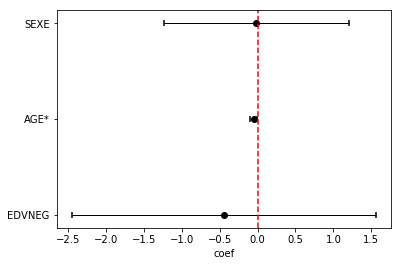

In [27]:
cph.plot()
plt.axvline(0, linestyle='--', color='red');

The slope of the survival curve, called _hazard_ is the rate of death (event) in a short time interval. When comparing two groups, we often assume that the ratio of hazard functions is constant over time. The hazards (death rates) may change over the course of the study, but at any time point the group A risk of dying is xx% the risk of the group B. The two hazard functions are proportional to one another, hence the name _proportional hazards regression_. If the assumption is true, then the difference between the survival curves can be quantified by a single number, a **relative risk**. If the ratio is 0.5 the relative risk of dying in one group is half the risk of dying in the other group.

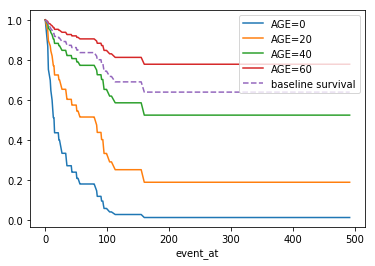

In [28]:
# After fitting, we can plot what the survival curves look like as we vary a single covarite 
# while holding everything else equal. This is useful to understand the impact of a covariate, 
# given the model. 

cph.plot_covariate_groups('AGE', [0, 20, 40, 60])

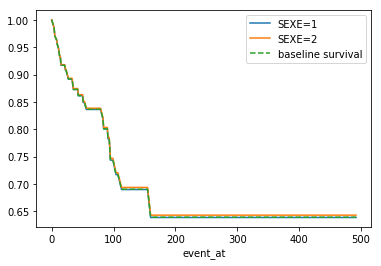

In [29]:
cph.plot_covariate_groups('SEXE', [1,2])
# CI for SEXE and EDVNEG, therefore not much difference